In [578]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок


def get_filled(df): # функция замены NaN на None
    return df.apply(lambda x: None if pd.isnull(x) else x)

def analize_by_column(df, name, num=10): # функция анализа колонки
    display(pd.DataFrame(df[name].value_counts()))
    print(f'Значений, встретившихся в столбце более {num} раз:', (df[name].value_counts()>num).sum())
    print("Уникальных значений:", df[name].nunique())
    print("Пустых значений:", df[name].isnull().sum())
    print("\n")
    
    df.loc[:, [name]].info()
    
def create_hist(c_name, b = 4): # функция построения гистограммы
    stud[c_name].hist(bins = b)
    print(stud[c_name].describe())
    
def dropColumn(name_list): # функция удаления колонки
    stud.drop(name_list, inplace = True, axis = 1)

stud = pd.read_csv('stud_math.xls')

In [579]:
for x in stud.columns:
    if stud[x].isnull().sum() > 0:
        stud[x] = get_filled(stud[x])

display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Видим, что данный датасет содержит 13 числовых столбцов и 17 строковых столбцов.

Рассмотрим столбец age:

In [580]:
analize_by_column(stud, 'age')

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 8
Пустых значений: 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

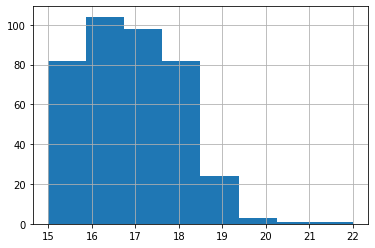

In [581]:
stud.age.hist(bins = 8)
stud.age.describe()

Как мы видим, возраст большинства учащихся распределен между 16 и 18 (медиана 17, 25-й перцентиль 16 и 75-й — 18)

Рассмотрим столбец address:

In [582]:
analize_by_column(stud, 'address')

,address
U,295
R,83


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Рассмотрим столбец famsize:

In [583]:
analize_by_column(stud, 'famsize')

,famsize
GT3,261
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB



Рассмотрим столбец Pstatus:

In [584]:
analize_by_column(stud, 'Pstatus')

,Pstatus
T,314
A,36


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Преобладает статус совместного жилья родителей 'T' - живут вместе.

Рассмотрим столбец Medu:

In [585]:
analize_by_column(stud, 'Medu')

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
Пустых значений: 3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


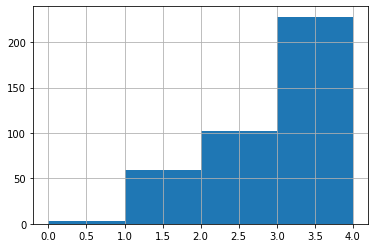

In [586]:
create_hist('Medu')

Как мы видим, образование матери большинства учащихся распределено между 2 (5-9 классы) и 4 (высшее), медиана 3, 25-й перцентиль 2 и 75-й — 4.

Рассмотрим столбец Fedu:

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
Пустых значений: 24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64


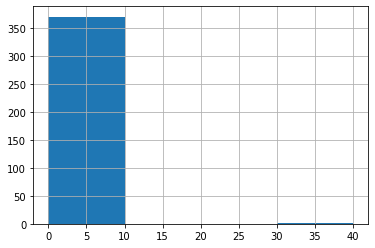

In [587]:
analize_by_column(stud, 'Fedu')
create_hist('Fedu', b=4)

В данной колонке скорее всего содержится опечатка, так как мы знаем что  интервал лежит от 0 до 4, но мы видим значение 40.
Будем считать, что это опечатка.Исправим это:

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


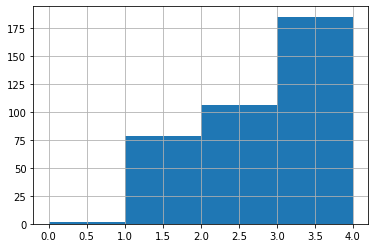

In [588]:
mask = stud['Fedu'] == 40
stud.loc[mask, 'Fedu'] = 4
create_hist('Fedu', b=4)

Как мы видим, образование отца большинства учащихся распределено между 2 (5-9 классы) и 3 (среднее специальное или 11 классов), медиана 2, 25-й перцентиль 2 и 75-й — 3.
Это говорит о том, что средняя образования отцов хуже, чем средняя образования у матерей.

Рассмотрим столбец Mjob:

In [589]:
analize_by_column(stud, 'Mjob')

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Пустых значений: 19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Рассмотрим столбец Fjob:

In [590]:
analize_by_column(stud, 'Fjob')

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Пустых значений: 36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Вывод из данного анализа по столбцам Mjob и Fjob можно сделать один, те и другие имеют другую профессию не обозначенную в данном столбце.

Рассмотрим столбец reason:

In [591]:
analize_by_column(stud, 'reason')

,reason
course,137
home,104
reputation,103
other,34


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
Пустых значений: 17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Рассмотрим столбец guardian:

In [592]:
analize_by_column(stud, 'guardian')

,guardian
mother,250
father,86
other,28


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
Пустых значений: 31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Рассмотрим столбец traveltime:

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 4
Пустых значений: 28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


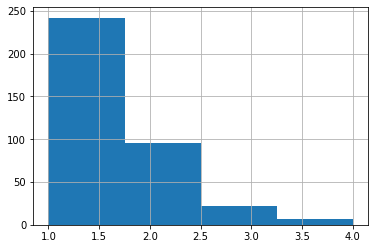

In [593]:
analize_by_column(stud, 'traveltime')
create_hist('traveltime', b=4)

Из данной гистограммы видно, что в основном время в пути до школы занимает меньше 15 минут.

Рассмотрим столбец studytime:

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
Пустых значений: 7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


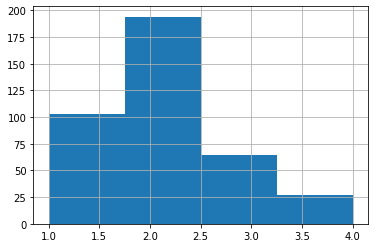

In [594]:
analize_by_column(stud, 'studytime')
create_hist('studytime', b=4)

Время, которое тратят ученики на учёбу помимо школы в неделю в среднем составляет 2-5 часов.

Рассмотрим столбец failures:

In [595]:
analize_by_column(stud, 'failures')

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
Пустых значений: 22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [596]:
analize_by_column(stud, 'schoolsup')

,schoolsup
no,335
yes,51


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [597]:
analize_by_column(stud, 'famsup')

,famsup
yes,219
no,137


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [598]:
analize_by_column(stud, 'paid')

,paid
no,200
yes,155


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [599]:
analize_by_column(stud, 'activities')

,activities
yes,195
no,186


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [600]:
analize_by_column(stud, 'nursery')

,nursery
yes,300
no,79


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [601]:
analize_by_column(stud, 'higher')

,higher
yes,356
no,19


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [602]:
analize_by_column(stud, 'internet')

,internet
yes,305
no,56


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [603]:
analize_by_column(stud, 'romantic')

,romantic
no,240
yes,124


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пустых значений: 31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
Пустых значений: 27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


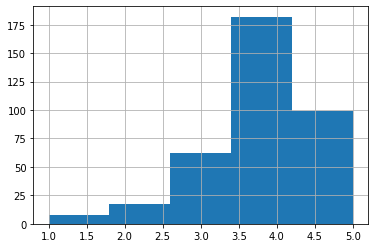

In [604]:
stud.loc[stud['famrel'] == -1, 'famrel'] = 1
analize_by_column(stud, 'famrel')
create_hist('famrel', b=5)

Данная гистограмма показывает что, семейные отношения у большинства учеников хорошие.

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Пустых значений: 11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


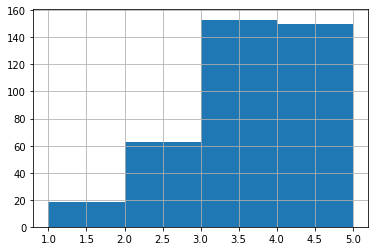

In [605]:
analize_by_column(stud, 'freetime')
create_hist('freetime', b=4)

Медиана данной гистограммы равняется 3, это значит, что свободное время после школы у большинства учеников достаточно.

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Пустых значений: 8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


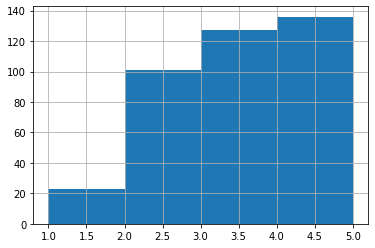

In [606]:
analize_by_column(stud, 'goout')
create_hist('goout', b=4)

Большинство учеников часто проводят время с друзьями.

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Пустых значений: 15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


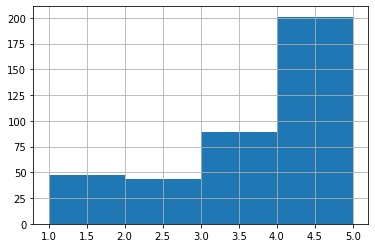

In [607]:
analize_by_column(stud, 'health')
create_hist('health', b=4)

Большинство учеников имеют хорошее здоровье.

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 36
Пустых значений: 12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


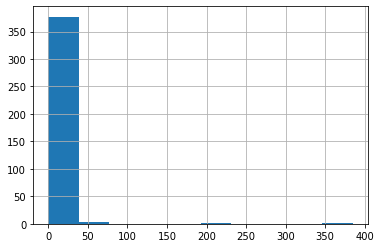

In [608]:
analize_by_column(stud, 'absences')

stud.absences.hist(bins = 10)
print(stud.absences.describe())

Видим, что основное распределение лежит между 0 и 80  процентами и есть потенциальные выбросы свыше 100% (об этом нам говорит наш здравый смысл).



25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


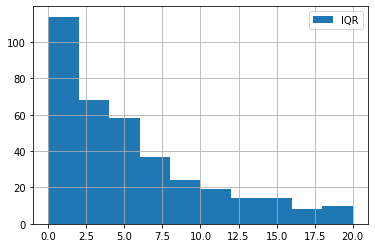

In [609]:
median = stud.absences.median()
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, label = 'IQR')

plt.legend()


In [610]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]


,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,29
70.0,27
40.0,26
45.0,23
80.0,16


Значений, встретившихся в столбце более 10 раз: 11
Уникальных значений: 17
Пустых значений: 5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   361 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


<AxesSubplot:>

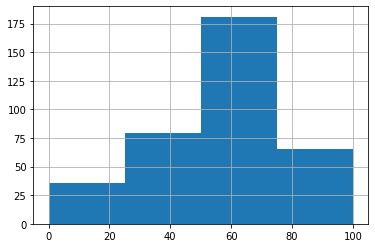

In [611]:
analize_by_column(stud, 'score')
print(stud.score.describe())
stud.score.hist(bins = 4)

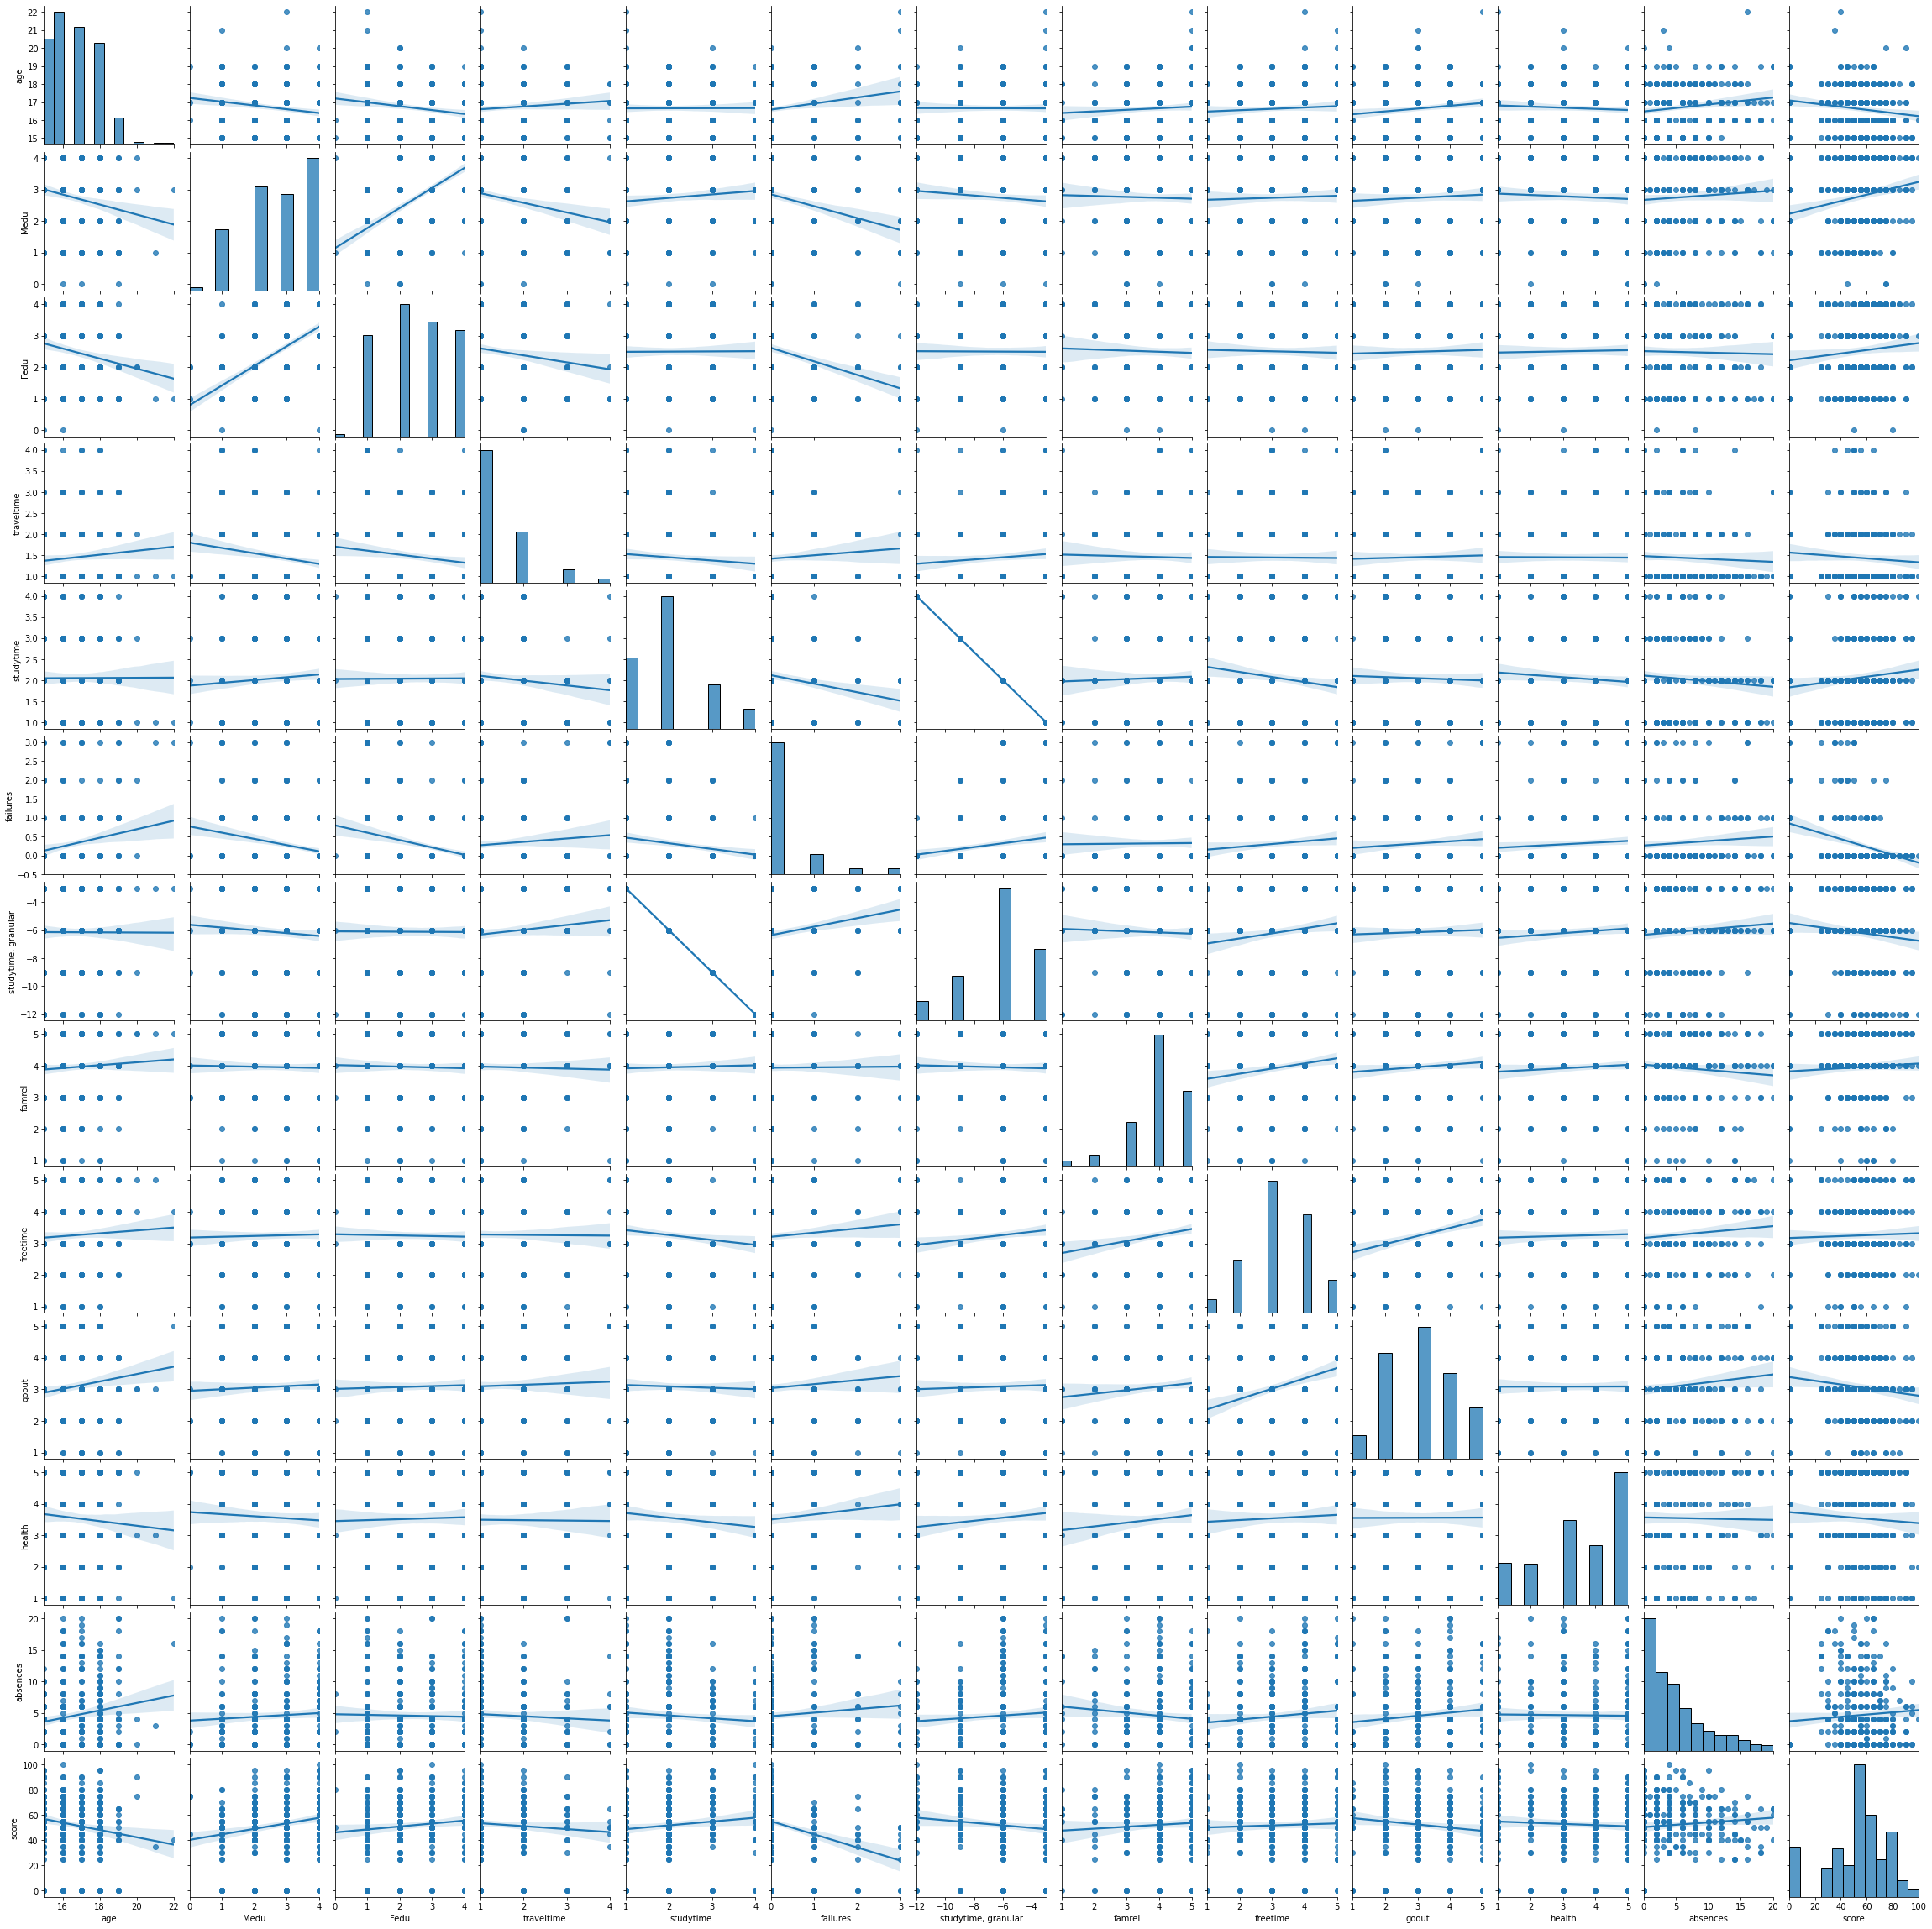

In [612]:
sns.pairplot(stud, kind = 'reg')

In [613]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.182463,-0.185368,0.085659,0.003035,0.195400,-0.003035,0.063204,0.058193,0.135466,-0.067958,0.151493,-0.159306
Medu,-0.182463,1.000000,0.629212,-0.197009,0.085532,-0.249754,-0.085532,-0.023323,0.027861,0.049094,-0.052316,0.065712,0.210257
Fedu,-0.185368,0.629212,1.000000,-0.145846,0.005116,-0.289421,-0.005116,-0.029874,-0.021205,0.029427,0.023932,-0.021811,0.113379
traveltime,0.085659,-0.197009,-0.145846,1.000000,-0.093825,0.085026,0.093825,-0.025343,-0.008602,0.031481,-0.006809,-0.047995,-0.074045
studytime,0.003035,0.085532,0.005116,-0.093825,1.000000,-0.174802,-1.000000,0.029926,-0.136510,-0.034197,-0.090552,-0.078099,0.113113
failures,0.195400,-0.249754,-0.289421,0.085026,-0.174802,1.000000,0.174802,0.009730,0.098642,0.085448,0.084991,0.081801,-0.329542
"studytime, granular",-0.003035,-0.085532,-0.005116,0.093825,-1.000000,0.174802,1.000000,-0.029926,0.136510,0.034197,0.090552,0.078099,-0.113113
famrel,0.063204,-0.023323,-0.029874,-0.025343,0.029926,0.009730,-0.029926,1.000000,0.175624,0.092537,0.080079,-0.090500,0.061516
freetime,0.058193,0.027861,-0.021205,-0.008602,-0.136510,0.098642,0.136510,0.175624,1.000000,0.289474,0.038437,0.093436,0.034952
goout,0.135466,0.049094,0.029427,0.031481,-0.034197,0.085448,0.034197,0.092537,0.289474,1.000000,0.002320,0.111587,-0.122246


Исходя из корреляционного анализа можно сделать вывод о том, что столбцы  age, Medu, Fedu, studytime, failures, goout имеют влияние на переменную score.

Так как переменные studytime и studytime,granular скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная studytime,granular.

Останутся слабоскоррелированные с score переменные: traveltime, famrel, freetime, health, absences.

In [614]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (5, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

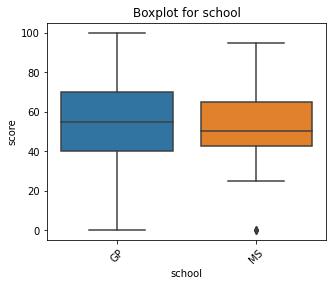

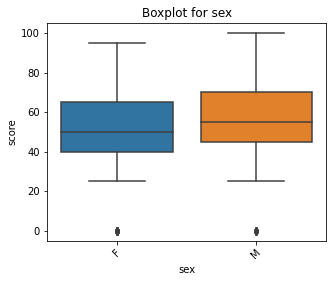

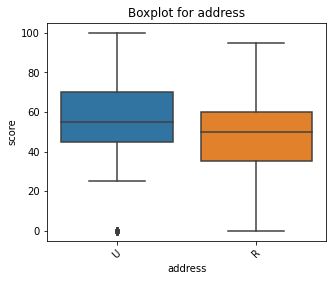

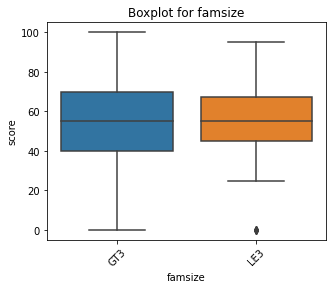

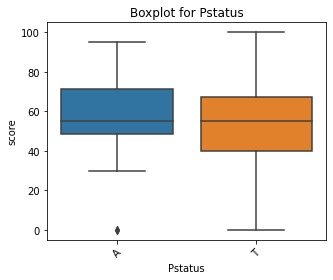

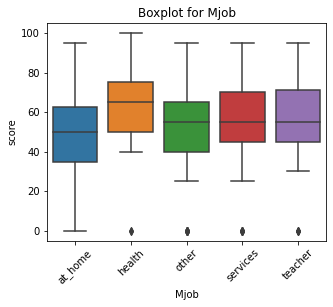

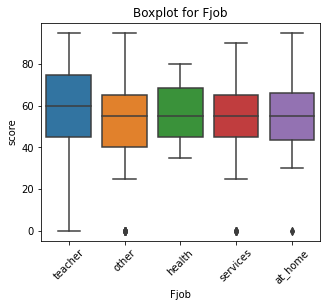

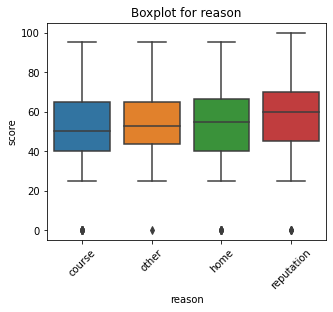

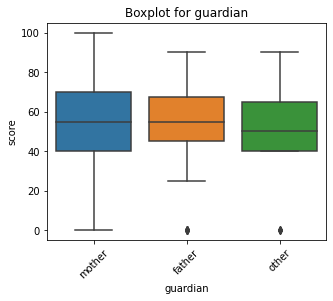

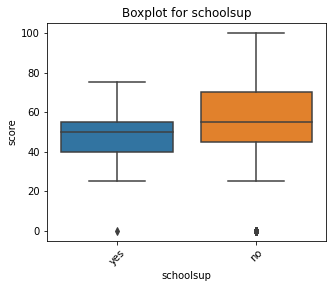

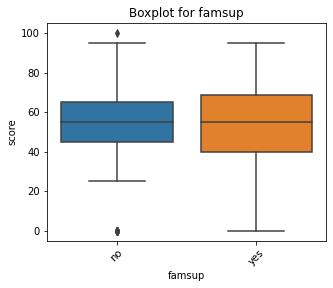

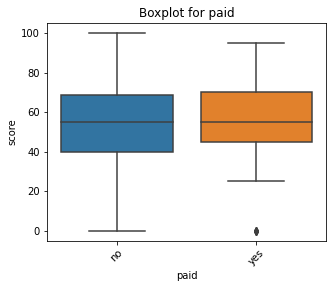

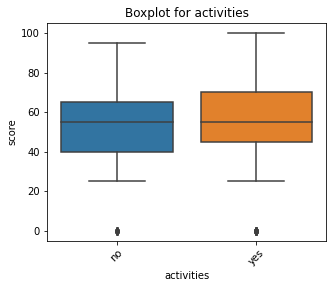

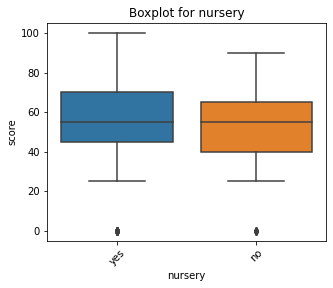

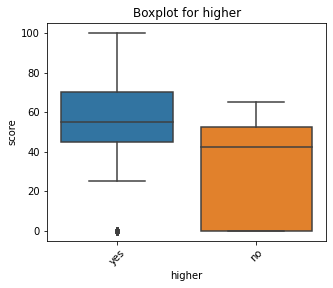

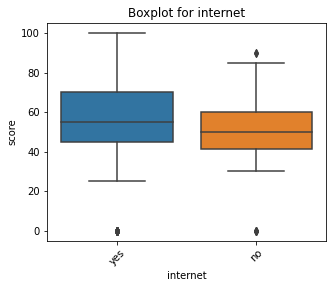

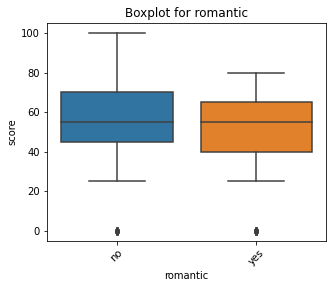

In [615]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup','famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме Mjob, schoolsup, higher, не влияют на score. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в условиях жизни учащихся по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения условий по различным параметрам неразличимы:

In [616]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [617]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup','famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


Как мы видим, серьёзно отличается только один параметр: Mjob. 
В нашем случае важные переменные, которые, возможно, оказывают влияние на score, это: schoolsup, higher.

Удалим ненужные колонки:

In [618]:
dropColumn(['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic'])

In [619]:
stud_for_model = stud.loc[:, ['age', 'Medu', 'Fedu', 'Mjob', 'studytime', 'schoolsup', 'failures', 'higher', 'goout']]
stud_for_model.head()

,age,Medu,Fedu,Mjob,studytime,schoolsup,failures,higher,goout
0,18,4.0,4.0,at_home,2.0,yes,0.0,yes,4.0
1,17,1.0,1.0,at_home,2.0,no,0.0,yes,3.0
2,15,1.0,1.0,at_home,2.0,yes,3.0,yes,2.0
3,15,4.0,2.0,health,3.0,no,0.0,yes,2.0
4,16,3.0,3.0,other,2.0,no,0.0,yes,2.0


Итак, в результате EDA для анализа влияния параметров условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

В данных достаточно много пустых значений, только столбцы school, age и sex были заполнены без пропусков.

Выбросы найдены во всех столбцах для номинативных переменных, что позволяет сделать вывод о том, что данные нечистые.

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, Medu, Fedu, Mjob, studytime, schoolsup, failures, higher, goout.